In [33]:
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/MyDrive/praktikum_ml/praktikum09"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#Load dataset

In [34]:
cancer_data = pd.read_csv(path + "/data/data.csv")
cancer_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


#Exploratory Data Analysis (EDA)

##Melihat Gambaran Awal Dataset

In [ ]:
cancer_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
cancer_data.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [ ]:
cancer_data.shape

(569, 33)

In [ ]:
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

##Pemeriksaan Missing Value

In [ ]:
cancer_data.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


###Menghapus Kolom Tidak Relevan

In [ ]:
cancer_data = cancer_data.drop(columns=["id", "Unnamed: 32"])

In [ ]:
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

##Analisis Outlier

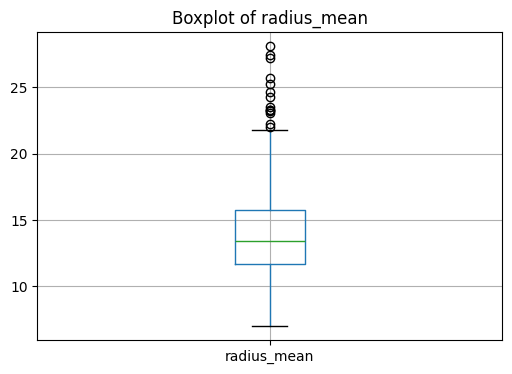

In [ ]:
plt.figure(figsize=(6,4))
cancer_data.boxplot(column=['radius_mean'])
plt.title("Boxplot of radius_mean")
plt.show()

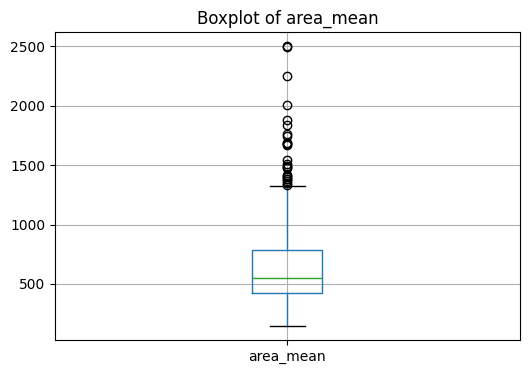

In [ ]:
plt.figure(figsize=(6,4))
cancer_data.boxplot(column=['area_mean'])
plt.title("Boxplot of area_mean")
plt.show()

##Statistik Deskriptif

In [ ]:
cancer_data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


##Distribusi Label

In [ ]:
# Distribusi label diagnosis (B = Benign / jinak, M = Malignant / ganas)
cancer_data["diagnosis"].value_counts()

,count
diagnosis,
B,357
M,212


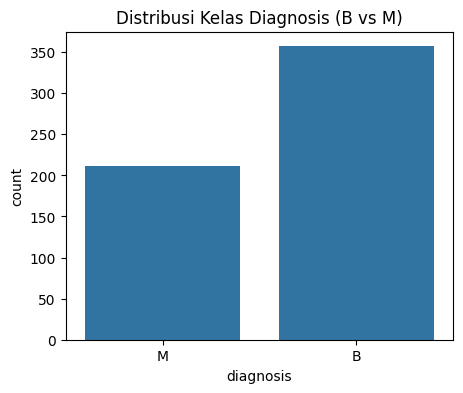

In [ ]:
plt.figure(figsize=(5,4))
sns.countplot(data=cancer_data, x="diagnosis")
plt.title("Distribusi Kelas Diagnosis (B vs M)")
plt.show()


Dataset memiliki 569 baris dan 33 kolom

*   Pengecekan Nilai Kosong: Ditemukan bahwa kolom Unnamed: 32 sepenuhnya berisi nilai kosong (569 non-null count dari 569 baris). Kolom id juga diperiksa
*   Penghapusan Kolom Tidak Relevan: Kolom id dan Unnamed: 32 dihapus karena tidak relevan untuk pemodelan. Setelah penghapusan, tersisa 31 kolom

*   Analisis Outlier: Pemeriksaan visual menggunakan boxplot pada fitur radius_mean dan area_mean menunjukkan adanya outlier (titik data di luar batas wajar), yang ditandai dengan titik-titik di luar whisker kotak. * Statistik Deskriptif: Ringkasan statistik menunjukkan distribusi data numerik, seperti nilai rata-rata (radius_mean $\approx 14.13$) dan standar deviasi9.
*   Distribusi Label Target (diagnosis):

    B (Benign/Jinak) : 357 sampel

    M (Malignant/Ganas) : 212 sampel

    Dataset menunjukkan ketidakseimbangan kelas yang moderat (sekitar 63% Benign dan 37% Malignant).







#Preprocessing Data

##Encoding label

In [ ]:
# Encoding diagnosis
cancer_data["diagnosis"] = cancer_data["diagnosis"].map({"B": 0, "M": 1})

# Cek hasil encoding
cancer_data[["diagnosis"]].head()

,diagnosis
0,1
1,1
2,1
3,1
4,1


In [ ]:
cancer_data['diagnosis'].value_counts()

,count
diagnosis,
0,357
1,212


Kolom target diagnosis diubah dari nilai kategorikal ('B' dan 'M') menjadi nilai numerik biner:
*   B (Benign) di-encode menjadi 0
*   M (Malignant) di-encode menjadi 1



#Visualisasi Data

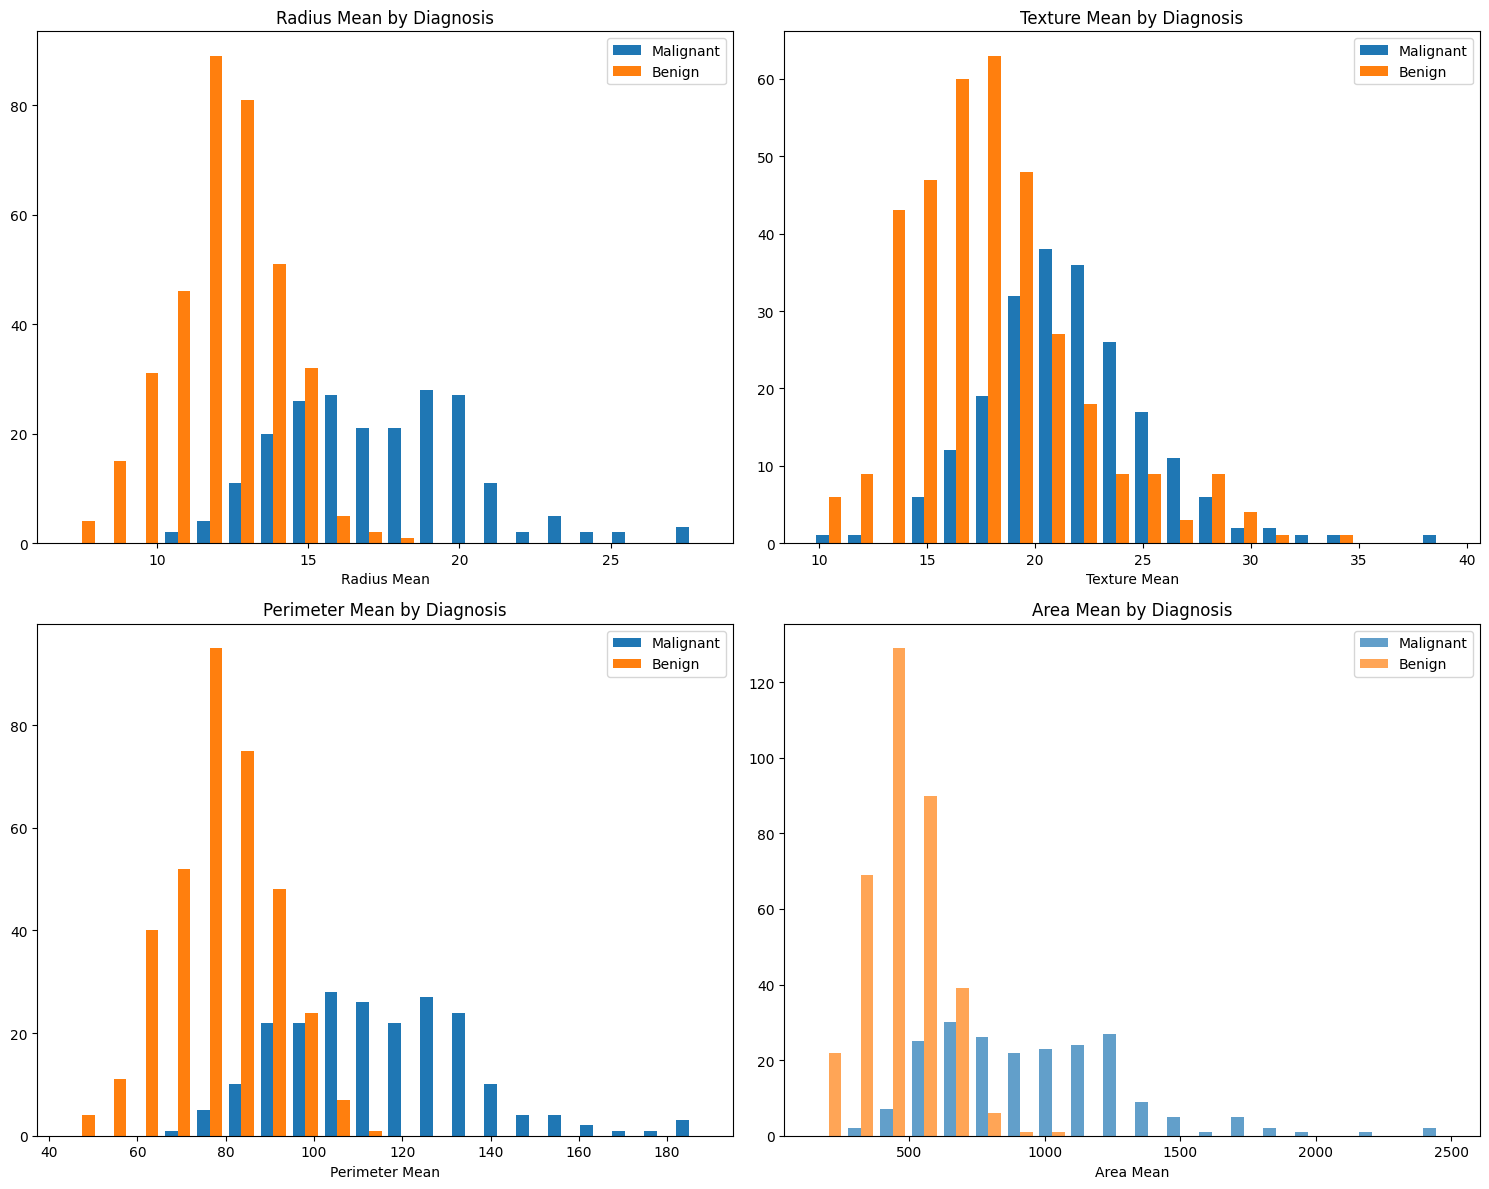

In [ ]:
# Visualisasi distribusi beberapa fitur berdasarkan diagnosis
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))

# Radius mean by diagnosis
axes[0, 0].hist([cancer_data[cancer_data['diagnosis']==1]['radius_mean'],
                 cancer_data[cancer_data['diagnosis']==0]['radius_mean']],
                label=['Malignant', 'Benign'], bins=20)
axes[0, 0].set_title('Radius Mean by Diagnosis')
axes[0, 0].set_xlabel('Radius Mean')
axes[0, 0].legend()

# Texture mean by diagnosis
axes[0, 1].hist([cancer_data[cancer_data['diagnosis']==1]['texture_mean'],
                 cancer_data[cancer_data['diagnosis']==0]['texture_mean']],
                label=['Malignant', 'Benign'], bins=20)
axes[0, 1].set_title('Texture Mean by Diagnosis')
axes[0, 1].set_xlabel('Texture Mean')
axes[0, 1].legend()

# Perimeter mean by diagnosis
axes[1, 0].hist([cancer_data[cancer_data['diagnosis']==1]['perimeter_mean'],
                 cancer_data[cancer_data['diagnosis']==0]['perimeter_mean']],
                label=['Malignant', 'Benign'], bins=20)
axes[1, 0].set_title('Perimeter Mean by Diagnosis')
axes[1, 0].set_xlabel('Perimeter Mean')
axes[1, 0].legend()

# Area mean by diagnosis
axes[1, 1].hist([cancer_data[cancer_data['diagnosis']==1]['area_mean'],
                 cancer_data[cancer_data['diagnosis']==0]['area_mean']],
                label=['Malignant', 'Benign'], bins=20, alpha=0.7)
axes[1, 1].set_title('Area Mean by Diagnosis')
axes[1, 1].set_xlabel('Area Mean')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

#Separating, Splitting, dan Scaling Data

In [ ]:
# Fitur = semua kolom kecuali diagnosis
X = cancer_data.drop(columns=["diagnosis"])

# Target = diagnosis
Y = cancer_data["diagnosis"]

In [ ]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
Y.head()

,diagnosis
0,1
1,1
2,1
3,1
4,1


In [ ]:
#Train-Test Split (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(
    X,
    Y,
    test_size=0.2,
    random_state=42,
    stratify=Y   # menjaga proporsi kelas tetap seimbang
)

X_train.shape, X_test.shape

((455, 30), (114, 30))

Data dibagi menjadi set pelatihan (Train) dan set pengujian (Test) dengan rasio 80% untuk pelatihan dan 20% untuk pengujian. Parameter stratify=Y digunakan untuk memastikan proporsi kelas target (0 dan 1) tetap sama di kedua set data12.

$X_{train}$ dan $Y_{train}$ memiliki 455 sampel.

$X_{test}$ dan $Y_{test}$ memiliki 114 sampel.

In [ ]:
# Membuat objek StandardScaler
scaler = StandardScaler()

# Fit + transform pada data train
X_train_scaled = scaler.fit_transform(X_train)

# Hanya transform pada data test
X_test_scaled = scaler.transform(X_test)

Dilakukan StandardScaler pada fitur untuk menormalkan data. Hal ini penting untuk model yang sensitif terhadap skala data (meskipun Naïve Bayes kurang sensitif dibandingkan model berbasis jarak, scaling tetap merupakan praktik yang baik):


*   fit_transform diterapkan pada data latih (X_train).
*   Hanya transform diterapkan pada data uji (X_test) untuk mencegah kebocoran data (data leakage).

#Training Model Naïve Bayes (GaussianNB)

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Inisialisasi model Gaussian Naive Bayes
nb_model = GaussianNB()

# Training model
nb_model.fit(X_train_scaled, Y_train)

GaussianNB()

##Prediksi Data Uji

In [ ]:
# Prediksi data train & test
train_pred_nb = nb_model.predict(X_train_scaled)
test_pred_nb = nb_model.predict(X_test_scaled)

##Hitung akurasi

In [ ]:
# Hitung akurasi
train_acc_nb = accuracy_score(Y_train, train_pred_nb)
test_acc_nb = accuracy_score(Y_test, test_pred_nb)

print("Naive Bayes Training Accuracy:", train_acc_nb)
print("Naive Bayes Testing Accuracy :", test_acc_nb)

Naive Bayes Training Accuracy: 0.945054945054945
Naive Bayes Testing Accuracy : 0.9210526315789473


Model digunakan untuk memprediksi data latih dan data uji, kemudian akurasinya dihitung:

Akurasi Pelatihan (Train): $\approx \mathbf{0.945}$ (94.5%)

Akurasi Pengujian (Test): $\approx \mathbf{0.921}$ (92.1%)

#Confusion Matrix

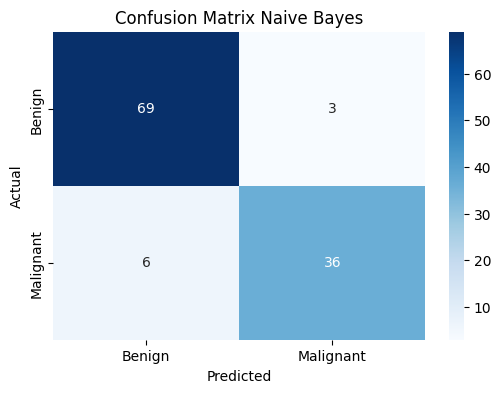

In [ ]:
# Visualisasi Confusion Matrix (Naive Bayes)
plt.figure(figsize=(6,4))
cm_nb = confusion_matrix(Y_test, test_pred_nb)
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Blues",
xticklabels=['Benign', 'Malignant'],
yticklabels=['Benign', 'Malignant'])
plt.title("Confusion Matrix Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#Classification Report

In [ ]:
print("Classification Report (Naive Bayes):")
print(classification_report(Y_test, test_pred_nb))

Classification Report (Naive Bayes):
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        72
           1       0.92      0.86      0.89        42

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.91       114
weighted avg       0.92      0.92      0.92       114



Precision (Kelas 1 - Malignant): 0.92. Dari semua prediksi Malignant, 92% benar.

Recall (Kelas 1 - Malignant): 0.86. Model berhasil mengidentifikasi 86% dari semua kasus Malignant yang sebenarnya.

F1-Score (Kelas 1 - Malignant): 0.89. Merupakan rata-rata harmonik dari Precision dan Recall.

#Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
cv_nb = cross_val_score(nb_model, X, Y, cv = 5 , scoring='accuracy')
print("\nNaive Bayes Cross Validation Accuracy (5-Fold):")
print("Scores:", cv_nb)
print("Mean Accuracy:", cv_nb.mean())
print("Std Deviation:", cv_nb.std())


Naive Bayes Cross Validation Accuracy (5-Fold):
Scores: [0.92105263 0.92105263 0.94736842 0.94736842 0.95575221]
Mean Accuracy: 0.9385188635305075
Std Deviation: 0.014585994424363306


Digunakan 5-Fold Cross Validation untuk mendapatkan estimasi kinerja model yang lebih robust (tidak bergantung pada satu pembagian train-test tertentu).

Skor (5-Fold): [0.921, 0.921, 0.947, 0.947, 0.956]

Rata-rata Akurasi (Mean Accuracy): $\approx \mathbf{0.939}$

Standar Deviasi (Std Deviation): $\approx \mathbf{0.015}$

#Kesimpulan

Berdasarkan hasil praktikum ini, dapat disimpulkan bahwa algoritma Naïve Bayes (GaussianNB) efektif untuk klasifikasi dataset Breast Cancer Wisconsin.



1.   Praproses Data dilakukan dengan membersihkan kolom tidak relevan, encoding label, membagi data (80:20), dan menormalisasi fitur menggunakan StandardScaler.
2.   Kinerja Model sangat baik. Akurasi pengujian mencapai 92.1% dan rata-rata akurasi Cross-Validation (5-Fold) adalah 93.9%
3.   Evaluasi Terperinci menunjukkan model memiliki Precision dan Recall yang tinggi (0.92 dan 0.86, berturut-turut, untuk kelas Malignant/Ganas), mengindikasikan model memiliki kemampuan yang baik untuk memprediksi kasus Benign dan Malignant, dengan sedikit lebih baik dalam mengidentifikasi kasus Benign (Recall 0.96) daripada Malignant.
4.  Standar Deviasi yang kecil dari Cross-Validation ($\approx 0.015$) menunjukkan model memiliki konsistensi kinerja yang baik terlepas dari bagaimana data dibagi

Secara keseluruhan, Gaussian Naïve Bayes terbukti menjadi model klasifikasi yang andal dan akurat untuk kasus prediksi kanker payudara ini.